# Face Mask Detection

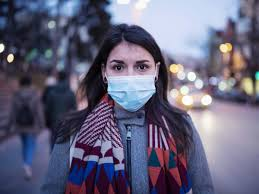

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
main_dir = r'C:\Users\MIHIR TAYSHETE\Coursera ML course\kaggle\input\covid-face-mask-detection-dataset\New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
validation_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_non_mask_dir = os.path.join(train_dir,'Non Mask')

In [4]:
train_mask_dir_names = os.listdir(train_mask_dir)
train_non_mask_dir_names = os.listdir(train_non_mask_dir)

print(train_mask_dir_names[:10])
print(train_non_mask_dir_names[:10])

['0003.jpg', '0006.jpg', '0018.jpg', '0019.jpg', '0022.jpg', '0027.jpg', '0029.jpg', '0037.jpg', '0040.jpg', '0042.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


In [5]:
import matplotlib.image as npimg
nrows=4
ncols=4
plt.figure(figsize=(12,12))

mask_pic = []

for i in train_mask_dir_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

no_mask_pic = []

for i in train_non_mask_dir_names[0:8]:
  no_mask_pic.append(os.path.join(train_non_mask_dir,i))

<Figure size 864x864 with 0 Axes>

In [6]:
print(mask_pic)
print(no_mask_pic)

['C:\\Users\\MIHIR TAYSHETE\\Coursera ML course\\kaggle\\input\\covid-face-mask-detection-dataset\\New Masks Dataset\\Train\\Mask\\0003.jpg', 'C:\\Users\\MIHIR TAYSHETE\\Coursera ML course\\kaggle\\input\\covid-face-mask-detection-dataset\\New Masks Dataset\\Train\\Mask\\0006.jpg', 'C:\\Users\\MIHIR TAYSHETE\\Coursera ML course\\kaggle\\input\\covid-face-mask-detection-dataset\\New Masks Dataset\\Train\\Mask\\0018.jpg', 'C:\\Users\\MIHIR TAYSHETE\\Coursera ML course\\kaggle\\input\\covid-face-mask-detection-dataset\\New Masks Dataset\\Train\\Mask\\0019.jpg', 'C:\\Users\\MIHIR TAYSHETE\\Coursera ML course\\kaggle\\input\\covid-face-mask-detection-dataset\\New Masks Dataset\\Train\\Mask\\0022.jpg', 'C:\\Users\\MIHIR TAYSHETE\\Coursera ML course\\kaggle\\input\\covid-face-mask-detection-dataset\\New Masks Dataset\\Train\\Mask\\0027.jpg', 'C:\\Users\\MIHIR TAYSHETE\\Coursera ML course\\kaggle\\input\\covid-face-mask-detection-dataset\\New Masks Dataset\\Train\\Mask\\0029.jpg', 'C:\\Users\\

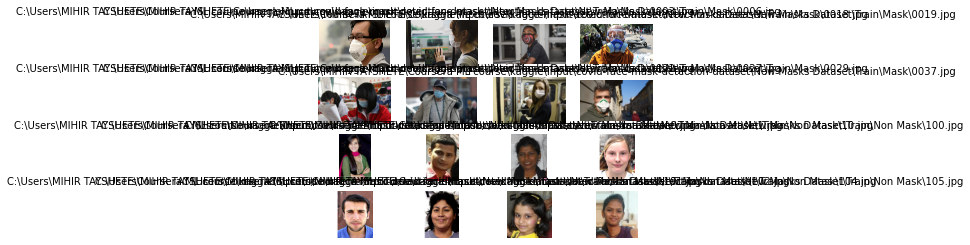

In [7]:
merged_list = mask_pic + no_mask_pic

for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',0)[0]
  sp = plt.subplot(nrows,ncols,i+1)
  plt.axis('Off')
  image = npimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')
plt.show()

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   rotation_range=40,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_images_generator = train_datagen.flow_from_directory(train_dir,
                                                           target_size=(180,180),
                                                           batch_size=32,
                                                           class_mode='binary')

test_images_generator = test_datagen.flow_from_directory(test_dir,
                                                           target_size=(180,180),
                                                           batch_size=32,
                                                           class_mode='binary')

valid_images_generator = validation_datagen.flow_from_directory(validation_dir,
                                                           target_size=(180,180),
                                                           batch_size=32,
                                                           class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [9]:
train_images_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [10]:
train_images_generator.image_shape

(180, 180, 3)

***Building Convolutional neural network***

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(180,180,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 45, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0

In [12]:
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history = model.fit(train_images_generator,epochs=5,validation_data=valid_images_generator)

Epoch 1/5
19/19 [==============================] - 18s 985ms/step - loss: 0.5792 - accuracy: 0.7050 - val_loss: 0.5708 - val_accuracy: 0.8497
Epoch 2/5
19/19 [==============================] - 20s 1s/step - loss: 0.4441 - accuracy: 0.8150 - val_loss: 0.4646 - val_accuracy: 0.8366
Epoch 3/5
19/19 [==============================] - 21s 1s/step - loss: 0.4016 - accuracy: 0.8683 - val_loss: 0.3227 - val_accuracy: 0.9020
Epoch 4/5
19/19 [==============================] - 20s 1s/step - loss: 0.3197 - accuracy: 0.8883 - val_loss: 0.2631 - val_accuracy: 0.8922
Epoch 5/5
19/19 [==============================] - 20s 1s/step - loss: 0.3212 - accuracy: 0.8817 - val_loss: 0.2869 - val_accuracy: 0.9118


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'Epochs')

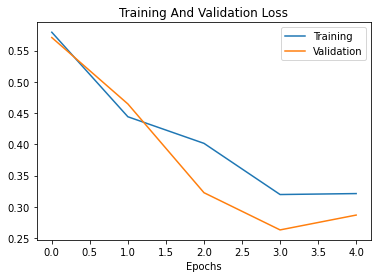

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title("Training And Validation Loss")
plt.xlabel("Epochs")

In [30]:
test_loss , test_acc = model.evaluate(test_images_generator)

print("Test Loss: {} Test Accuracy: {}".format(test_loss,test_acc))

4/4 [==============================] - 1s 333ms/step - loss: 0.2763 - accuracy: 0.9300
Test Loss: 0.27633631229400635 Test Accuracy: 0.9300000071525574


***As We See Our Model Is Not Overfitted.***

In [31]:
model.save('face_mask_detection.h5')

In [32]:
import matplotlib.image as mpimg
from keras.preprocessing import image

def test_image_mask_nomask(path):
    im = mpimg.imread(path)
    plt.imshow(im)
    
    img = image.load_img(path,target_size=(180,180))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    prediction = model.predict(img)
    if prediction == 0:
        
        print("Person Wearing A Mask")

    else:
        print("Person Not Wearing A Mask")

Person Wearing A Mask


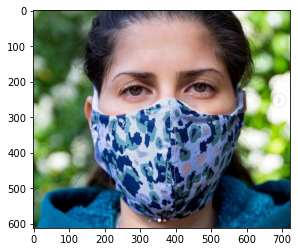

In [33]:
test_image_mask_nomask(r'C:\Users\MIHIR TAYSHETE\Coursera ML course\kaggle\input\covid-face-mask-detection-dataset\New Masks Dataset\Test\Mask/2265.png')

Person Not Wearing A Mask


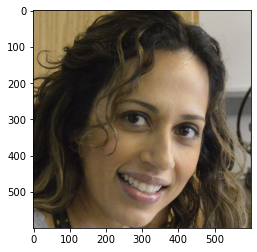

In [34]:
test_image_mask_nomask(r'C:\Users\MIHIR TAYSHETE\Coursera ML course\kaggle\input\covid-face-mask-detection-dataset\New Masks Dataset\Test\Non Mask/real_01050.jpg')

In [35]:
import cv2
import math
labels_dict={0:'without_mask',1:'with_mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

size = 4
webcam = cv2.VideoCapture(0) #Use camera 0

# We load the xml file
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) #Flip to act as a mirror

    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(mini)

    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(180,180))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,180,180,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        result = result+0.3
        print(result)
        label= math.floor(result[0][0])
        #print(label)

        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

    # Show the image
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break
# Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()

[[1.0289998]]
[[1.0289998]]
[[1.0530072]]
[[1.0427624]]
[[1.0427624]]
[[1.0419979]]
[[1.0419979]]
[[1.0328553]]
[[1.0328553]]
[[1.011839]]
[[1.011839]]
[[1.0043786]]
[[0.506845]]
[[0.506845]]
[[0.44432658]]
[[0.42530867]]
[[0.42530867]]
[[0.42192692]]
[[0.6179127]]
[[0.60747105]]
[[0.5994529]]
[[0.6396475]]
[[0.6436682]]
[[0.6434468]]
[[0.66945773]]
[[0.6860093]]
[[0.6497344]]
[[0.67986333]]
[[0.6965076]]
[[0.69055676]]
[[0.6865462]]
[[0.6981309]]
[[0.6764707]]
[[0.67922795]]
[[0.6910999]]
[[0.69900966]]
[[0.72399914]]
[[0.6949036]]
[[0.6906549]]
[[0.6718524]]
[[0.7047399]]
[[0.70342153]]
[[0.72204316]]
[[0.7176783]]
[[0.677983]]
[[0.7347399]]
[[0.72788733]]
[[0.70707]]
[[0.702147]]
[[0.6947168]]
[[0.6989435]]
[[0.71027786]]
[[0.78079563]]
[[0.76383054]]
[[0.69416773]]
[[0.71805584]]
[[0.75218314]]
[[0.7563016]]
[[0.74439746]]
[[0.7121872]]
[[0.7053472]]
[[0.71980363]]
[[0.7014849]]
[[0.7069572]]
[[0.68264616]]
[[0.8830429]]
[[0.49060845]]
[[0.4712346]]
[[0.49404973]]
[[0.49404973]]
[[

[[0.89665765]]
[[0.93781495]]
[[0.9085921]]
[[0.983555]]
[[0.9560705]]
[[0.97244143]]
[[0.9929101]]
[[0.96825486]]
[[0.93723845]]
[[1.002075]]
[[0.95819587]]
[[0.9444534]]
[[0.92739636]]
[[0.95528316]]
[[0.8985114]]
[[0.95232904]]
[[0.91234887]]
[[0.8670464]]
[[0.9186085]]
[[0.92866975]]
[[0.91064036]]
[[0.95873487]]
[[0.90364766]]
[[0.89279586]]
[[0.9062446]]
[[0.90766317]]
[[0.8894462]]
[[0.9089466]]
[[0.9556203]]
[[0.92878145]]
[[0.8160124]]
[[0.8791451]]
[[0.7779368]]
[[0.7259247]]
[[0.65183234]]
[[0.7074721]]
[[0.6199166]]
[[0.4276048]]
[[0.5175002]]
[[0.5175002]]
[[0.5866858]]
[[0.6324828]]
[[0.6205808]]
[[0.6166718]]
[[0.7681223]]
[[0.59693587]]
[[0.59104824]]
[[0.58215904]]
[[0.57665485]]
[[0.58086973]]
[[0.61992294]]
[[0.703794]]
[[0.7915084]]
[[0.94436103]]
[[0.91075104]]
[[0.913426]]
[[0.9663474]]
[[0.9435907]]
[[0.93784064]]
[[0.91330206]]
[[0.90640175]]
[[0.9553376]]
[[0.8957562]]
[[0.9555023]]
[[0.3460267]]
[[0.8850155]]
[[0.8715566]]
[[0.42521474]]
[[1.0481954]]
[[0.4145